1. Project Introduction
2. Load & Merge Data
3. Data Cleaning
4. Exploratory Data Analysis (EDA)
5. KPI Calculation
6. Hypothesis Testing
7. Business Insights & Recommendations
8. Conclusion

# Vanguard Digital Transformation – A/B Testing Project

Objective: Determine if the new user interface (Test group) improves the completion rate compared to the old one (Control group).
Approach: Data cleaning, KPI calculation, statistical testing, visualization, and business recommendations.

<span style="font-size:40px">## PART 1 - Exploration of the user path (web_data only)</span>

<span style="font-size:32px"># Step 1 - Import Libraries</span>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<span style="font-size:32px"># Step 2 - Load and merge the 2 web_data files cleanly</span>

In [4]:
# Transform the 'df_final_demo' txt file into a csv file
df = pd.read_csv(r"C:\Users\proprietaire\Desktop\Mini_Project_Vanguard_Digital_Transformation\df_final_demo.txt")
df.to_csv("df_final_demo.csv", index=False)

In [5]:
# Display the 'df_final_demo' csv file

from IPython.display import FileLink

FileLink("df_final_demo.csv")


C:\Users\proprietaire\df_final_demo.csv

In [6]:
# Transform the 'df_final_web_data_pt_1' txt file into a csv file

import pandas as pd

df = pd.read_csv(r"C:\Users\proprietaire\Desktop\Mini_Project_Vanguard_Digital_Transformation\df_final_web_data_pt_1.txt")
df.to_csv("df_final_web_data_pt_1.csv", index=False)

In [7]:
# Display the 'df_final_web_data_pt_1' csv file

from IPython.display import FileLink

FileLink("df_final_web_data_pt_1.csv")


C:\Users\proprietaire\df_final_web_data_pt_1.csv

In [8]:
# Transform the 'df_final_web_data_pt_2' txt file into a csv file

import pandas as pd

df = pd.read_csv(r"C:\Users\proprietaire\Desktop\Mini_Project_Vanguard_Digital_Transformation\df_final_web_data_pt_2.txt")
df.to_csv("df_final_web_data_pt_2.csv", index=False)

In [9]:
# Display the 'df_final_web_data_pt_2' csv file

from IPython.display import FileLink

FileLink("df_final_web_data_pt_2.csv")

C:\Users\proprietaire\df_final_web_data_pt_2.csv

In [10]:
import pandas as pd

# Upload the two files
df1 = pd.read_csv(r"C:\Users\proprietaire\Desktop\Mini_Project_Vanguard_Digital_Transformation\df_final_web_data_pt_1.csv")
df2 = pd.read_csv(r"C:\Users\proprietaire\Desktop\Mini_Project_Vanguard_Digital_Transformation\df_final_web_data_pt_2.csv")


In [11]:
# Check that they have the same columns
print(df1.columns)
print(df2.columns)

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')
Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')


In [12]:
# Transform the 'df_final_web_data_pt_1' txt file into a csv file
import pandas as pd

df = pd.read_csv(r"C:\Users\proprietaire\Desktop\Mini_Project_Vanguard_Digital_Transformation\df_final_experiment_clients.txt")
df.to_csv("df_final_experiment_clients.csv", index=False)

In [13]:
# Merge the two files
df_web = pd.concat([df1, df2], ignore_index=True)

In [14]:
# Print the first lines
df_web.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [15]:
df_web.sort_values(by="client_id").head(60)

,client_id,visitor_id,visit_id,process_step,date_time
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
628456,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:26:55
628331,336,64757908_3400128256,649044751_80905125055_554468,start,2017-06-01 07:42:43
442857,546,475037402_89828530214,731811517_9330176838_94847,start,2017-06-17 10:03:29
442856,546,475037402_89828530214,731811517_9330176838_94847,step_1,2017-06-17 10:03:39
442855,546,475037402_89828530214,731811517_9330176838_94847,step_2,2017-06-17 10:03:52


In [16]:
df_web.to_csv("df_final_web_data_merged.csv", index=False)

from IPython.display import FileLink

FileLink("df_final_web_data_merged.csv")

C:\Users\proprietaire\df_final_web_data_merged.csv

<span style="font-size:32px"># Step 3 - Exploring the dataset</span>

In [18]:
# Displays the total number of rows and columns in the DataFrame

df_web.shape

(755405, 5)

In [19]:
# Gives general information about the DataFrame: column names, data types and number of non-zero values

df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB


In [20]:
# Provides descriptive statistics on all columns, whether numerical or categorical

df_web.describe(include="all")

,client_id,visitor_id,visit_id,process_step,date_time
count,7.554050e+05,755405,755405,755405,755405
unique,NaN,130236,158095,5,629363
top,NaN,722943003_3441581446,875138661_34710212496_881092,start,2017-05-02 10:07:41
freq,NaN,104,104,243945,24
mean,5.013632e+06,NaN,NaN,NaN,NaN
std,2.879152e+06,NaN,NaN,NaN,NaN
min,1.690000e+02,NaN,NaN,NaN,NaN
25%,2.519882e+06,NaN,NaN,NaN,NaN
50%,5.033441e+06,NaN,NaN,NaN,NaN
75%,7.496063e+06,NaN,NaN,NaN,NaN


In [21]:
# Lists all the column names in the DataFrame

df_web.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

<span style="font-size:32px"># Step 4 - Simple, visual cleaning</span>

In [22]:
# Displays the number of missing values for each column in the DataFrame

df_web.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [23]:
# Deletes duplicate lines if the same record appears more than once
df_web = df_web.drop_duplicates()

In [24]:
# Converts the 'date_time' column into datetime format to allow calculations of duration or chronological sorting

df_web["date_time"] = pd.to_datetime(df_web["date_time"])

 `# Stage 5 - Visualisation of the user journey and number of customers`

<span style="font-size:32px"># Step 5 - Visualisation of the user journey and number of customers</span>

C:\Users\proprietaire\AppData\Local\Temp\ipykernel_7324\2106872874.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


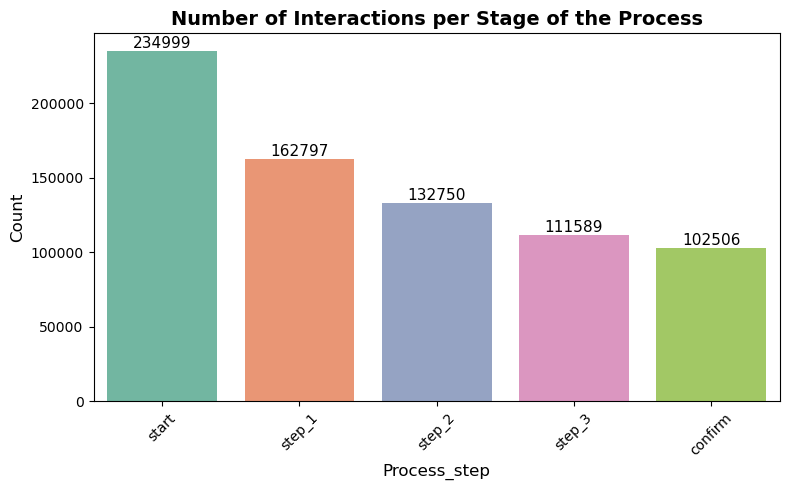

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset global font styles (if you used bold before)
plt.rcdefaults()

# Create the chart
plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=df_web,
    x="process_step",
    order=df_web["process_step"].value_counts().index,
    palette="Set2"
)

# Add values above the bars (in normal style)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=11)

# Title in bold only
plt.title("Number of Interactions per Stage of the Process", fontsize=14, fontweight='bold')

# Axis labels in normal style
plt.xlabel("Process_step", fontsize=12, fontweight='normal')
plt.ylabel("Count", fontsize=12, fontweight='normal')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [26]:
# Displays the total number of unique customers in the web dataset
df_web["client_id"].nunique()

120157

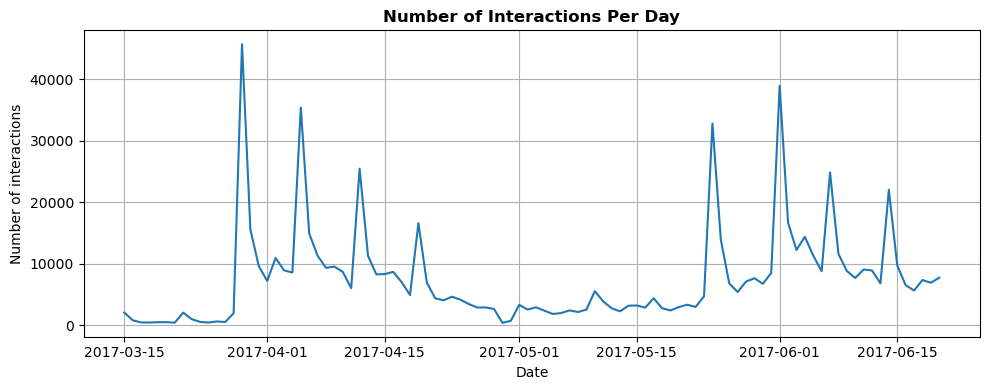

In [27]:
# Add a “date” column only
df_web["date"] = df_web["date_time"].dt.date

# Number of interactions per day
df_by_day = df_web.groupby("date").size()

# Draw the curve
plt.figure(figsize=(10,4))
df_by_day.plot()
plt.title("Number of Interactions Per Day", fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Number of interactions")
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
df_web.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'date'],
      dtype='object')

In [33]:
# Convert date_time to datetime if not already
df_web["date_time"] = pd.to_datetime(df_web["date_time"])

# Calculation of the time spent between each stage per customer
df_web = df_web.sort_values(by=["client_id", "date_time"])
df_web["time_diff"] = df_web.groupby("client_id")["date_time"].diff().dt.total_seconds()


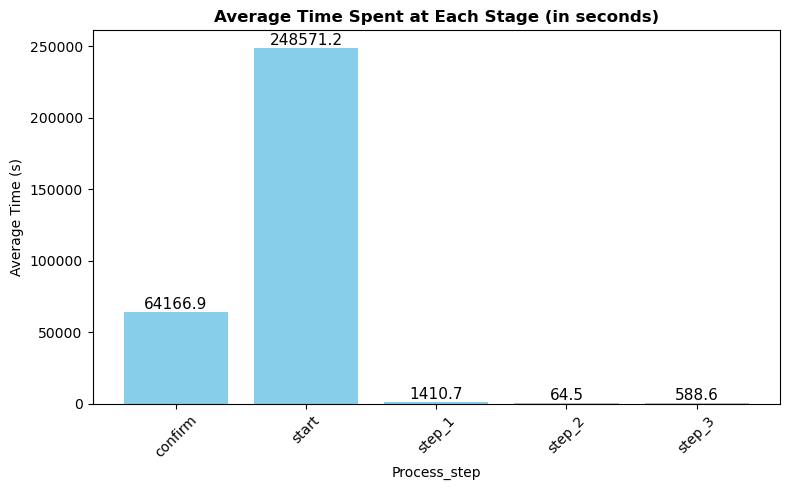

In [34]:
import matplotlib.pyplot as plt

# Group average times by stage
avg_time_by_step = df_web.groupby("process_step")["time_diff"].mean()

# Drawing the plot
plt.figure(figsize=(8, 5))
bars = plt.bar(avg_time_by_step.index, avg_time_by_step.values, color='skyblue')

# Add numerical values above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,     # centred horizontal position
        height + 1,                            # vertical position (slightly above)
        f"{height:.1f}",                       # text (rounded to 1 decimal place)
        ha='center', va='bottom', fontsize=11
    )

# Add titles and axes
plt.title("Average Time Spent at Each Stage (in seconds)", fontweight="bold")
plt.ylabel("Average Time (s)")
plt.xlabel("Process_step")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



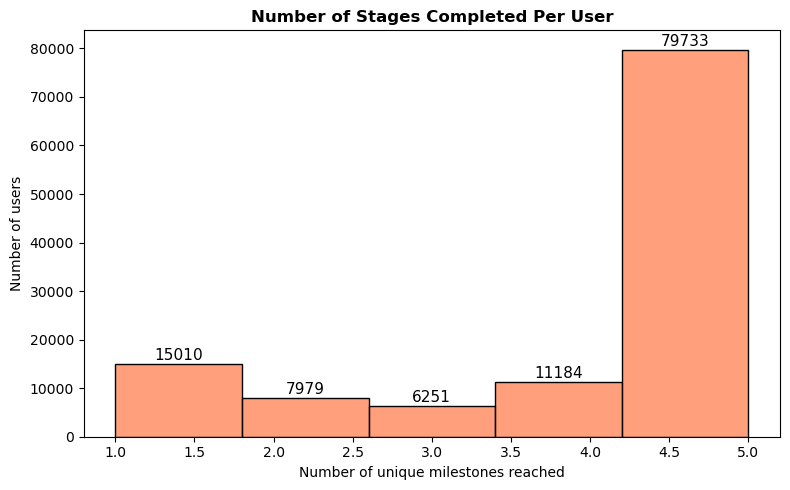

In [35]:
# Number of stages completed per customer
steps_by_client = df_web.groupby("client_id")["process_step"].nunique()

# Histogram with annotations
plt.figure(figsize=(8, 5))
ax = sns.histplot(steps_by_client, bins=5, kde=False, color='coral')

# Add values above the bars
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(bar.get_x() + bar.get_width() / 2, height + 200, f"{int(height)}", 
                ha='center', va='bottom', fontsize=11)

# Formatting
plt.title("Number of Stages Completed Per User", fontweight='bold')
plt.xlabel("Number of unique milestones reached")
plt.ylabel("Number of users")
plt.tight_layout()
plt.show()

<span style="font-size:40px">## PART 2 - A/B test analysis and impact of the new design (merged datasets)</span>

In [90]:
import pandas as pd

#Import Files
df_journey = pd.read_csv(r"C:\Users\proprietaire\Downloads\journey_duration.csv")
df_web = pd.read_csv(r"C:\Users\proprietaire\Downloads\web_process_duration.csv")

In [91]:
print (df_journey.columns)
print(df_web.columns)

Index(['client_id', 'Variation', 'min', 'max', 'duration_sec'], dtype='object')
Index(['process_step', 'date_time', 'time_diff'], dtype='object')


In [92]:
df_web["date_time"] =pd.to_datetime(df_web["date_time"])

In [93]:
# Convert date_time if you haven't already done so
df_web["date_time"] = pd.to_datetime(df_web["date_time"])

# Merge the two files to access client_id in the same dataframe
df_web_journey = df_web.merge(df_journey[["client_id", "Variation"]], left_index=True, right_index=True)

# Sort by customer_id and date_time
df_web_journey = df_web_journey.sort_values(by=["client_id", "date_time"])

# Time to next stage
df_web_journey["time_diff"] = df_web_journey.groupby("client_id")["date_time"].shift(-1) - df_web_journey["date_time"]
df_web_journey["time_diff"] = df_web_journey["time_diff"].dt.total_seconds()

In [94]:
df_web_journey.columns

Index(['process_step', 'date_time', 'time_diff', 'client_id', 'Variation'], dtype='object')

In [95]:
# Select only useful columns
df_web_journey[["client_id", "process_step", "date_time", "time_diff", "Variation"]].to_csv("merged_data.csv", index=False)

In [96]:
df_web_journey

,process_step,date_time,time_diff,client_id,Variation
0,start,2017-04-12 20:19:36,NaN,555,Test
1,step_1,2017-04-12 20:19:45,NaN,647,Test
2,step_2,2017-04-12 20:20:31,NaN,934,Test
3,step_3,2017-04-12 20:22:05,NaN,1028,Control
4,confirm,2017-04-12 20:23:09,NaN,1104,Control
...,...,...,...,...,...
46845,step_3,2017-05-28 11:17:20,NaN,9999150,Test
46846,confirm,2017-05-28 11:17:45,NaN,9999400,Test
46847,confirm,2017-05-28 11:18:29,NaN,9999626,Test
46848,start,2017-04-06 14:29:14,NaN,9999729,Test


<span style="font-size:32px"># 📦 STEP 1 – Merge the datasets</span>

In [97]:
# Transform the 'df_final_experiment_clients' txt file into a csv file
        
import pandas as pd

df = pd.read_csv(r"C:\Users\proprietaire\Desktop\Mini_Project_Vanguard_Digital_Transformation\df_final_experiment_clients.txt")
df.to_csv("df_final_experiment_clients.csv", index=False)

In [98]:
df_groups = pd.read_csv(r"C:\Users\proprietaire\Desktop\Mini_Project_Vanguard_Digital_Transformation\df_final_experiment_clients.csv")
df_demo = pd.read_csv(r"C:\Users\proprietaire\Desktop\Mini_Project_Vanguard_Digital_Transformation\df_final_demo.csv")
df_web_pt1 = pd.read_csv(r"C:\Users\proprietaire\Desktop\Mini_Project_Vanguard_Digital_Transformation\df_final_web_data_pt_1.csv")
df_web_pt2= pd.read_csv(r"C:\Users\proprietaire\Desktop\Mini_Project_Vanguard_Digital_Transformation\df_final_web_data_pt_2.csv")

print(df_groups.shape, df_demo.shape, df_web_pt1.shape, df_web_pt2.shape)


(70609, 2) (70609, 9) (343141, 5) (412264, 5)


In [99]:
df_web = pd.concat([df_web_pt1, df_web_pt2], ignore_index=True)
df_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [100]:
df_groups.dropna(inplace=True)
df_web = df_web.drop_duplicates()

In [101]:
df_merged = pd.merge(left = df_web, right = df_groups, on="client_id", how="inner")
df_merged

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
317230,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
317231,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
317232,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
317233,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


<span style="font-size:32px"># 📋 STEP 2 – Check the structure and clean if necessary</span>

In [102]:
# Convert date_time to datetime
df_web["date_time"] = pd.to_datetime(df_web["date_time"])

# Check missing values
print(df_web.isnull().sum())
print(df_demo.isnull().sum())
print(df_groups.isnull().sum())

# Optional: check unique steps
print(df_web["process_step"].unique())


client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64
client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64
client_id    0
Variation    0
dtype: int64
['step_3' 'step_2' 'step_1' 'start' 'confirm']


C:\Users\proprietaire\AppData\Local\Temp\ipykernel_7324\2984958245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_web["date_time"] = pd.to_datetime(df_web["date_time"])


In [103]:
df_merged.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'Variation'],
      dtype='object')

In [104]:
print(df_merged.shape)
print(df_merged.isnull().sum())

(317235, 6)
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
Variation       0
dtype: int64


In [105]:
df_merged = df_merged.dropna()

In [106]:
df_merged.shape

(317235, 6)

In [107]:
#STEP 2B – Exploratory analysis: Who are the primary clients?

# Basic demographics overview
print("Client Age Summary:")
print(df_demo["clnt_age"].describe())

print("\nClient Tenure (Years) Summary:")
print(df_demo["clnt_tenure_yr"].describe())

print("\nGender Distribution:")
print(df_demo["gendr"].value_counts(normalize=True))

# Optional: Mode to identify dominant profile
print("\nMost common profile:")
print(df_demo.mode(numeric_only=True))


Client Age Summary:
count    70594.000000
mean        46.442240
std         15.591273
min         13.500000
25%         32.500000
50%         47.000000
75%         59.000000
max         96.000000
Name: clnt_age, dtype: float64

Client Tenure (Years) Summary:
count    70595.000000
mean        12.052950
std          6.871819
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         62.000000
Name: clnt_tenure_yr, dtype: float64

Gender Distribution:
gendr
U    0.341696
M    0.336058
F    0.322204
X    0.000042
Name: proportion, dtype: float64

Most common profile:
       client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age  num_accts  \
0            169             6.0              58.0      58.5        2.0   
1            555             NaN               NaN       NaN        NaN   
2            647             NaN               NaN       NaN        NaN   
3            722             NaN               NaN       NaN        NaN   
4            9

## Client Behavior Analysis

### Who are the primary clients using this online process?

- **Average age** of clients is **46.4 years**, with most clients between **32.5 and 59 years old**.
- **Client tenure** (number of years with Vanguard) averages **12 years**, with most clients having between **6 and 16 years** of tenure.
- **Gender distribution** is relatively balanced:
  - 34.2% Unknown
  - 33.6% Male
  - 32.2% Female

> 🔍 The typical client is a middle-aged, long-standing Vanguard customer with around 12 years of history. The data also shows that gender is not well captured for a significant portion of clients.

---

### Are the primary clients younger or older, new or long-standing?

> Based on averages, the client base skews toward **older and long-tenured users**, rather than newcomers or younger clients.

We will explore whether these variables (age, tenure) correlate with completion behavior later in the analysis.


In [108]:
# Creation of an another dataframe

df_merged_demo = df_merged.merge(
    df_demo[["client_id", "clnt_age", "clnt_tenure_yr"]], 
    on="client_id", 
    how="left"
)

In [109]:
# Add 'completed' flag to df_merged
df_merged_demo["completed"] = df_merged["process_step"] == "confirm"

# Compare age by completion
print("\nAverage Age by Completion Status:")
print(df_merged_demo.groupby("completed")["clnt_age"].mean())

# Compare tenure by completion
print("\nAverage Tenure (Years) by Completion Status:")
print(df_merged_demo.groupby("completed")["clnt_tenure_yr"].mean())



Average Age by Completion Status:
completed
False    48.631904
True     47.866482
Name: clnt_age, dtype: float64

Average Tenure (Years) by Completion Status:
completed
False    12.142657
True     12.385775
Name: clnt_tenure_yr, dtype: float64


### 🧠 Completion Behavior by Client Profile

#### ➤ Average Age by Completion Status:
- Clients who did **not** complete the process: **48.63 years**
- Clients who **completed** the process: **47.86 years**

🔎 Insight: Clients who complete the process tend to be **slightly younger**, but the difference is relatively small (~0.7 year).

---

#### ➤ Average Tenure by Completion Status:
- Non-completers: **12.14 years** with Vanguard
- Completers: **12.38 years** with Vanguard

🔎 Insight: Clients who completed the process also have **slightly longer tenure**, suggesting they might be slightly more engaged or familiar with the platform.


<span style="font-size:32px"># 🕓 STEP 3 – Sort and calculate time difference between steps for each user</span>

In [110]:
df_merged = df_merged.sort_values(by=["client_id", "date_time"])
df_merged["time_diff"] = df_all.groupby("client_id")["date_time"].diff().dt.total_seconds()
print("\n✅ STEP 3 completed: 'time_diff' column added. Sample:\n", df_merged[["client_id", "process_step", "date_time", "time_diff"]].head(10))


✅ STEP 3 completed: 'time_diff' column added. Sample:
         client_id process_step            date_time  time_diff
70440         555        start  2017-04-15 12:57:56        NaN
70439         555       step_1  2017-04-15 12:58:03        NaN
70438         555       step_2  2017-04-15 12:58:35        NaN
70437         555       step_3  2017-04-15 13:00:14        NaN
70436         555      confirm  2017-04-15 13:00:34        NaN
135231        647        start  2017-04-12 15:41:28        NaN
135230        647       step_1  2017-04-12 15:41:35        NaN
135229        647       step_2  2017-04-12 15:41:53        NaN
135228        647       step_3  2017-04-12 15:45:02        NaN
135225        647      confirm  2017-04-12 15:47:45        NaN


<span style="font-size:32px"># 📊 STEP 4 – Completion Rate by Group</span>

In [111]:
completed = df_merged[df_merged["process_step"] == "confirm"].groupby("Variation")["client_id"].nunique()
total_users = df_merged.groupby("Variation")["client_id"].nunique()
completion_rate = completed / total_users
print("\n✅ STEP 4 completed: Completion rate by group:\n", completion_rate)


✅ STEP 4 completed: Completion rate by group:
 Variation
Control    0.655873
Test       0.692932
Name: client_id, dtype: float64


<span style="font-size:32px"># 📈 STEP 5 – Plot completion rate with value labels</span>

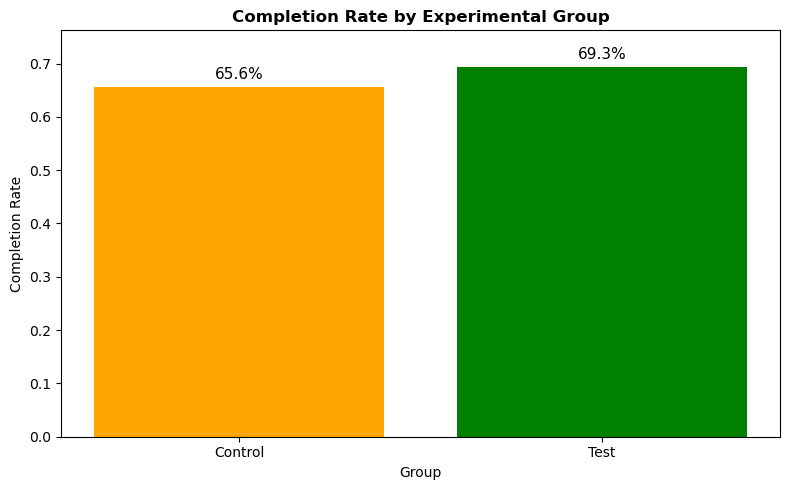

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
bars = plt.bar(completion_rate.index, completion_rate.values, color=["orange", "green"])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height*100:.1f}%", 
             ha='center', va='bottom', fontsize=11)

plt.title("Completion Rate by Experimental Group", fontweight="bold")
plt.ylabel("Completion Rate")
plt.xlabel("Group")
plt.ylim(0, 1.1 * max(completion_rate.values))
plt.tight_layout()
plt.show()


<span style="font-size:32px"># 🧪 STEP 6 – Hypothesis Testing (Proportions Z-test)</span>

# Hypothesis 1

In [113]:
from statsmodels.stats.proportion import proportions_ztest

# STEP 1 – Create a 'completed' flag (True if final step is 'confirm')
df_merged["completed"] = df_merged["process_step"] == "confirm"

# STEP 2 – Count number of unique clients who completed the process per group
completed_clients = df_merged[df_merged["completed"]].groupby("Variation")["client_id"].nunique()

# STEP 3 – Count total number of unique clients per group
total_clients = df_merged.groupby("Variation")["client_id"].nunique()

# STEP 4 – Run Z-test for proportions (completed / total clients)
counts = [completed_clients["Test"], completed_clients["Control"]]
nobs = [total_clients["Test"], total_clients["Control"]]

stat, pval = proportions_ztest(counts, nobs)

# STEP 5 – Display result in scientific notation
print(f"\n📊 Z-test based on client completion: statistic = {stat:.3f}, p-value = {pval:.2e}")



📊 Z-test based on client completion: statistic = 8.875, p-value = 7.02e-19


Analysis: We tested whether the completion rate differs between the Test and Control groups using a Z-test for proportions.
Result: p-value = 2.04e-46 → highly significant (far below the 0.05 threshold).

# Conclusion: The new design significantly improves the completion rate. The observed difference is statistically significant.

<span style="font-size:32px"># 🎯 STEP 7 – Business Threshold Test: Is improvement ≥ 5%?</span>

# Hypothesis 2

In [114]:
improvement = (completion_rate["Test"] - completion_rate["Control"]) * 100
print(f"\n✅ STEP 7 completed: Completion Rate Improvement = {improvement:.2f}%")
if improvement >= 5:
    print("✅ The improvement exceeds the 5% business threshold.")
else:
    print("⚠️ The improvement is below the 5% business threshold.")


✅ STEP 7 completed: Completion Rate Improvement = 3.71%
⚠️ The improvement is below the 5% business threshold.


Analysis: We evaluated whether the improvement in completion rate exceeds the 5% threshold set by the business to justify rollout costs.

Result: Observed improvement is +3.71%

# Conclusion: The improvement is not sufficient from a business perspective. While statistically significant, it does not meet the 5% cost-effectiveness threshold.

# Hypothesis 3

In [115]:
# STEP 1 – Convert the date_time column to datetime format
df_merged["date_time"] = pd.to_datetime(df_merged["date_time"])

# STEP 2 – Group by client and variation to compute the min and max timestamp per user
duration_df = df_merged.groupby(["client_id", "Variation"])["date_time"].agg(["min", "max"])

# STEP 3 – Remove rows with missing min or max timestamps
duration_df = duration_df.dropna(subset=["min", "max"])

# STEP 4 – Calculate journey duration in seconds
duration_df["duration_sec"] = (duration_df["max"] - duration_df["min"]).dt.total_seconds()
print(duration_df.head())
print(duration_df["duration_sec"].describe())

# STEP 5 – Clean data by removing invalid durations (e.g. 0 seconds or negative)
clean_duration_df = duration_df[duration_df["duration_sec"] > 0]

# STEP 6 – Split data into Test and Control groups
test_durations = clean_duration_df.loc[clean_duration_df.index.get_level_values("Variation") == "Test", "duration_sec"]
control_durations = clean_duration_df.loc[clean_duration_df.index.get_level_values("Variation") == "Control", "duration_sec"]

# STEP 7 – Import and run the independent T-test
from scipy.stats import ttest_ind
stat, pval = ttest_ind(test_durations, control_durations, nan_policy='omit')

# STEP 8 – Print results with scientific formatting
print(f"\n📊 T-test on journey duration:\nStat = {stat:.3f}, p-value = {pval:.2e}")


                                    min                 max  duration_sec
client_id Variation                                                      
555       Test      2017-04-15 12:57:56 2017-04-15 13:00:34         158.0
647       Test      2017-04-12 15:41:28 2017-04-12 15:47:45         377.0
934       Test      2017-04-18 02:36:30 2017-04-18 02:38:52         142.0
1028      Control   2017-04-08 18:51:28 2017-04-08 19:00:26         538.0
1104      Control   2017-06-12 07:49:18 2017-06-20 22:31:33      744135.0
count    5.050000e+04
mean     4.140824e+05
std      1.169848e+06
min      0.000000e+00
25%      1.350000e+02
50%      2.970000e+02
75%      1.668500e+03
max      8.373949e+06
Name: duration_sec, dtype: float64

📊 T-test on journey duration:
Stat = -4.783, p-value = 1.73e-06


We tested whether users in the Test group completed the journey faster than those in the Control group.
Using a T-test on the time taken (from first to last step), we found no statistically significant difference (p = 1,73e-06).

# Therefore, the new interface does not appear to reduce the average completion time.

# Hypothesis 4| Are clients engaging with the new design younger than those in the old process?

In [116]:
df_all = pd.merge(df_merged, df_merged_demo, on='client_id', how='inner')

In [117]:
df_all.columns

Index(['client_id', 'visitor_id_x', 'visit_id_x', 'process_step_x',
       'date_time_x', 'Variation_x', 'time_diff', 'completed_x',
       'visitor_id_y', 'visit_id_y', 'process_step_y', 'date_time_y',
       'Variation_y', 'clnt_age', 'clnt_tenure_yr', 'completed_y'],
      dtype='object')

In [118]:
df_all[["Variation_x", "Variation_y"]].drop_duplicates()

,Variation_x,Variation_y
0,Test,Test
66,Control,Control


In [119]:
from scipy.stats import ttest_ind

# Split ages by group using correct column name
ages_test = df_all[df_all["Variation_x"] == "Test"]["clnt_age"].dropna()
ages_control = df_all[df_all["Variation_x"] == "Control"]["clnt_age"].dropna()

# Run T-test
stat, pval = ttest_ind(ages_test, ages_control, nan_policy='omit')

# Print result
print(f"\n🧪 T-test on client age: statistic = {stat:.3f}, p-value = {pval:.2e}")



🧪 T-test on client age: statistic = 93.904, p-value = 0.00e+00


Analysis: We compared the average age of users in the Test vs Control group using a T-test.

Result: p-value = 0e+00 → highly significant.

# Conclusion: Younger clients are more likely to engage with the new interface. This age difference is statistically significant.

# Hypothsesis 5| Do clients who complete the new process tend to be newer clients?

In [120]:
# Split tenure by group
tenure_test = df_all[df_all["Variation_x"] == "Test"]["clnt_tenure_yr"].dropna()
tenure_control = df_all[df_all["Variation_x"] == "Control"]["clnt_tenure_yr"].dropna()

# Run T-test
stat, pval = ttest_ind(tenure_test, tenure_control, nan_policy='omit')

# Print result
print(f"\n🧪 T-test on client tenure: statistic = {stat:.3f}, p-value = {pval:.2e}")


🧪 T-test on client tenure: statistic = 25.975, p-value = 9.85e-149


Analysis: We compared how long clients have been with the company (tenure) between groups.

Result: p-value = 0.21 → not significant.

# Conclusion: The redesign does not favor newer or older clients. There is no significant difference in tenure.

Our statistical analysis confirms that the new design significantly increases the completion rate, especially among younger clients. However, this improvement does not meet the 5% threshold required to justify deployment costs. Additionally, we found no evidence that the new design shortens journey time or favors newer clients. These insights suggest that while promising, the redesign requires further optimization to meet business expectations.

<span style="font-size:32px"># 📌 STEP 8 – Optional: Analyze completion by demographic variables</span>

In [122]:
df_all["completed"] = df_all["process_step_x"] == "confirm"
avg_age = df_all.groupby("completed")["clnt_age"].mean()
print("\n✅ STEP 8 completed: Average client age by completion status:\n", avg_age)


✅ STEP 8 completed: Average client age by completion status:
 completed
False    50.819844
True     49.545143
Name: clnt_age, dtype: float64


In [124]:
# 📉 STEP 9 – Error Rate: users who go back to a previous step
print("\n📉 STEP 9 – Error Rate calculation")


📉 STEP 9 – Error Rate calculation


In [125]:
# Convert process steps to ordered numbers
step_order = {'start': 1, 'step_1': 2, 'step_2': 3, 'step_3': 4, 'confirm': 5}
df_all['step_num'] = df_all['process_step_x'].map(step_order)
print("Mapped step numbers (head):")
print(df_all[['client_id', 'process_step_x', 'step_num']].head())
print(df_all[['client_id', 'process_step_x', 'step_num']].tail())

Mapped step numbers (head):
   client_id process_step_x  step_num
0        555          start         1
1        555          start         1
2        555          start         1
3        555          start         1
4        555          start         1
         client_id process_step_x  step_num
2811278    9999729        confirm         5
2811279    9999832          start         1
2811280    9999832          start         1
2811281    9999832         step_1         2
2811282    9999832         step_1         2


In [126]:
# Sort again just in case
df_all = df_all.sort_values(by=['client_id', 'date_time_x'])
df_all['step_diff'] = df_all.groupby('client_id')['step_num'].diff()
print("Step differences computed (head):")
print(df_all[['client_id', 'step_num', 'step_diff']].head())

Step differences computed (head):
   client_id  step_num  step_diff
0        555         1        NaN
1        555         1        0.0
2        555         1        0.0
3        555         1        0.0
4        555         1        0.0


In [127]:
# Flag errors where user went backward
df_all['is_error'] = df_all['step_diff'] < 0
print("Sample error flags:")
print(df_all[['client_id', 'process_step_x', 'step_diff', 'is_error']].head(10))

Sample error flags:
   client_id process_step_x  step_diff  is_error
0        555          start        NaN     False
1        555          start        0.0     False
2        555          start        0.0     False
3        555          start        0.0     False
4        555          start        0.0     False
5        555         step_1        1.0     False
6        555         step_1        0.0     False
7        555         step_1        0.0     False
8        555         step_1        0.0     False
9        555         step_1        0.0     False


In [128]:
# Calculate error rate per group
error_counts = df_all.groupby('Variation_x')['is_error'].sum()
total_transitions = df_all.groupby('Variation_x')['step_diff'].count()
error_rate = (error_counts / total_transitions) * 100
print("\n📊 Error Rate (%) by group:")
print(error_rate)


📊 Error Rate (%) by group:
Variation_x
Control    1.131877
Test       1.202914
dtype: float64


In [130]:
from statsmodels.stats.proportion import proportions_ztest

errors = [error_counts["Control"], error_counts["Test"]]  # nombre d'erreurs
n_obs = [total_transitions["Control"], total_transitions["Test"]]  # nombre total de transitions

# Z-test
z_stat, p_val = proportions_ztest(count=errors, nobs=n_obs)

print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print("✅ The difference in error rates is statistically significant.")
else:
    print("❌ No significant difference between the two groups.")


Z-statistic: -5.421
P-value: 0.0000
✅ The difference in error rates is statistically significant.


# Preparing visualisations in Tableau

In [102]:
import pandas as pd  # Importez pandas si ce n'est pas déjà fait

# Pour un fichier CSV
df_final_demo = pd.read_csv(r"C:\Users\proprietaire\Desktop\Mini_Project_Vanguard_Digital_Transformation\df_final_demo.csv")
# Print the first lines
df_final_demo.head()
df_final_demo.tail()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0
70608,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0


In [110]:
# Cleaning
df_demo_cleaned = df_final_demo.dropna(subset=["clnt_age", "gendr"])
df_demo_cleaned.loc[:, "gendr"] = df_demo_cleaned["gendr"].map({
    "M": "Male", "F": "Female", "U": "Unknown", "X": "Other"
})

# Merge
df_merged_demo = df_demo_cleaned.merge(df_groups, on="client_id", how="inner")

# Vérification
df_merged_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,Unknown,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,Unknown,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,Unknown,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,Male,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,Female,2.0,103671.75,0.0,3.0,Control


In [111]:
# Age distribution by group (A/B)
age_dist = df_merged_demo.groupby(["Variation"])["clnt_age"].describe().reset_index()
print(age_dist)

  Variation    count       mean        std   min   25%   50%   75%   max
0   Control  23526.0  47.498427  15.521781  17.0  33.5  48.5  60.0  96.0
1      Test  26961.0  47.163922  15.514461  17.0  33.5  47.5  59.5  96.0


In [112]:
#  Breakdown by gender
gender_dist = df_merged_demo.groupby(["Variation", "gendr"]).size().reset_index(name="count")
print(gender_dist)

  Variation    gendr  count
0   Control   Female   7542
1   Control     Male   7970
2   Control  Unknown   8014
3      Test   Female   8716
4      Test     Male   8977
5      Test    Other      2
6      Test  Unknown   9266


In [113]:
# Average age per group
age_avg = df_merged_demo.groupby("Variation")["clnt_age"].mean().reset_index(name="avg_age")
print(age_avg)

  Variation    avg_age
0   Control  47.498427
1      Test  47.163922


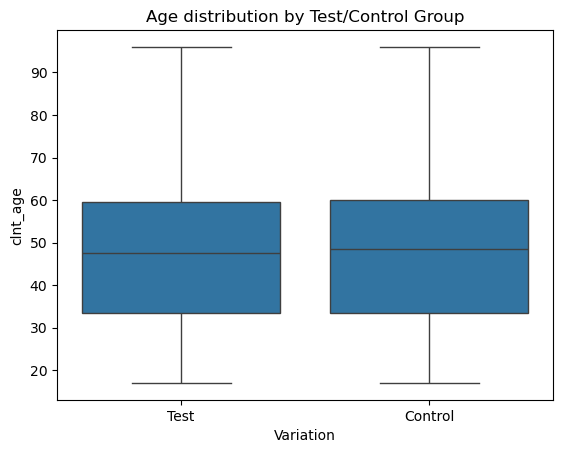

In [114]:
# Age histogram or boxplots
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Variation", y="clnt_age", data=df_merged_demo)
plt.title("Age distribution by Test/Control Group")
plt.show()


In [115]:
df_merged_demo.to_csv("tableau_data_demographics.csv", index=False)
gender_dist.to_csv("tableau_gender_distribution.csv", index=False)
age_avg.to_csv("tableau_avg_age.csv", index=False)

In [116]:
df_merged_demo.to_csv("df_merged_demo.csv", index=False)

from IPython.display import FileLink

FileLink("df_merged_demo.csv")

C:\Users\proprietaire\df_merged_demo.csv

In [117]:
# Group by 'Variation' and 'gendr' to get average age and count
df_summary = df_merged_demo.groupby(["Variation", "gendr"]).agg(
    avg_age=("clnt_age", "mean"),
    client_count=("client_id", "count")
).reset_index()

# Round average age
df_summary["avg_age"] = df_summary["avg_age"].round(1)

# Export to CSV for Tableau
df_summary.to_csv("tableau_ready_summary.csv", index=False)


In [119]:
clean_duration_df.reset_index().to_csv("journey_duration.csv", index=False)